In [ ]:
import sys
import os
import numpy as np
import time
import pandas as pd


def average_of_several_run_GPU(script: str, repeat: int):
    np.set_printoptions(threshold=np.inf, linewidth=np.inf, suppress=False)
    average_res = []
    for re in range(repeat):
        f = os.popen(script)
        # print(script)
        res = f.readlines()
        # print(res)
        if len(res[-1]) < 3:
            print("err")
            return [-1, 99999]
        res1 = res[0].strip().split(" ")[-2:] + res[-1].strip().split(" ")[-5:]
        average_res.append(res1)

    average_res = np.array(average_res).astype(float).mean(axis=0)
    # print(average_res)

    return average_res


repeat = 1
# if len(sys.argv) > 1:
#     repeat = int(sys.argv[1])

path = "/home/wzb/bc/GPU-butterfly/DynamicBatch/"
# f = os.popen('make')
# f.readlines()
dataPath = "/data/dataset/dataset"
# print(os.listdir(dataPath))
folds = os.listdir(dataPath)
print(folds)
# folds = ["twitter", "MANN-a81", "filcker", "livejournal", "delicious", "trackers", "orkut", "bi-twitter", "bi-sk", "bi-uk"]
Paras_all = [
    ("twitter", 20770352),
    ("MANN-a81", 44077616),
    ("filcker", 72359344),
    ("livejournal", 983981296),
    ("delicious", 1091282080),
    ("trackers", 1448285896),
    ("orkut", 2708412328),
    ("bi-twitter", 5147097304),
    ("bi-sk", 7692486280),
    ("bi-uk", 11242987032),
]
Paras_selected = [("livejournal", 983981296), ("delicious", 1091282080), ("trackers", 1448285896), ("orkut", 2708412328)]
filenames_sharedMemory = ["butterfly-shared0.bin", "butterfly-shared1.bin", "butterfly-shared2.bin", "butterfly-shared4.bin", "butterfly-shared8.bin"]
filenames_hashRecy = ["butterfly-adaptive.bin", "butterfly-scanwedge.bin", "butterfly-scantable.bin"]


def vary_execution_file(Paras, filenames):
    for fold, memorySize in Paras:
        filePath = os.path.join(dataPath, fold)
        if os.path.isdir(filePath):
            print(fold)
            for filename in filenames:
                script = path + filename + " " + filePath + "/ GPU 100 edge-centric 507374182400 108"
                print(average_of_several_run_GPU(script, repeat)[4])


def vary_subwarp_size(Paras):
    options = [1, 2, 4, 8, 16, 32]
    df = pd.DataFrame(columns=["Dataset"] + options)
    for fold, memorySize in Paras:
        filePath = os.path.join(dataPath, fold)
        if os.path.isdir(filePath):
            data = [fold]
            for option in options:
                script = path + "butterfly.bin " + filePath + "/ GPU 100 edge-centric 507374182400 108 -1 adaptiveRecy " + str(option)
                data.append(average_of_several_run_GPU(script, repeat)[3])
            print(data)
            df.loc[len(df)] = data  # type: ignore
    return df


def vary_hashtable_recy(Paras):
    options = ["adaptiveRecy", "scanHashtableRecy", "scanWedgeRecy"]
    df = pd.DataFrame(columns=["Dataset"] + options)
    for fold, memorySize in Paras:
        filePath = os.path.join(dataPath, fold)
        if os.path.isdir(filePath):
            data = [fold]
            for option in options:
                script = path + "butterfly.bin " + filePath + "/ GPU 100 edge-centric 507374182400 108 -1 " + option + " 16"
                data.append(average_of_several_run_GPU(script, repeat)[3])
            print(data)
            df.loc[len(df)] = data  # type: ignore
    return df


df = vary_subwarp_size(Paras_selected)


In [ ]:

import matplotlib.pyplot as plt
import matplotlib
# df.transpose().plot(x='Dataset', y=['1', '2', '4', '8', '16', '32'])
print(df.transpose())
# 将第一行作为列名
df.columns = df.iloc[0]
# 删除第一行
df = df[1:]
print(df)


0.339611 13.6332


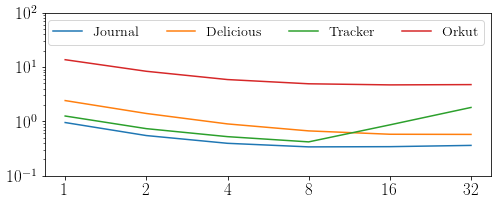

In [18]:
import sys
import os
import numpy as np
import time
import pandas as pd
from tkinter import font
from matplotlib.axes import Axes
from matplotlib.transforms import Bbox
from matplotlib import markers, pyplot as plt, scale
import matplotlib
from matplotlib import rcParams
import math
path = "/home/wzb/bc/GPU-butterfly/DynamicBatch/"
def reset_yaxis(df: pd.DataFrame):
    bottom, top = np.nanmin(df.to_numpy()), np.nanmax(df.to_numpy())
    print(bottom, top)
    bottom = np.float_power(10, math.floor(np.log10(bottom)))
    top = np.float_power(10, math.ceil(np.log10(top)))
    plt.ylim(bottom, top)
    plt.yticks(np.logspace(int(np.log10(bottom)), int(np.log10(top)), int(1 + np.log10(top) - np.log10(bottom))))

def plot_subwarp():
    rcParams["font.size"] = 17
    rcParams["figure.figsize"] = (8, 3)
    df = pd.read_csv(path + "result/" + "subwarp.csv", index_col=0)
    df = df.transpose()
    df.columns = df.iloc[0]
    df = df[1:]
    df.plot()
    plt.savefig(path + "result/" + "subwarp.pdf", bbox_inches="tight")
    name = ["Journal", "Delicious", "Tracker", "Orkut"]
    plt.legend(name, ncol=4, fontsize="small")
    plt.yscale("log")
    reset_yaxis(df)


# df = vary_subwarp_size(Paras_selected)
# df.to_csv(path + "result/" + "subwarp.csv")
plot_subwarp()